<a href="https://colab.research.google.com/github/wimero72/Regression_Lineal-Aula1/blob/main/Analisis_Precios_Habitaciones_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis y selección de modelos de regresión lineal
Como persona Científica de Datos, estás a cargo del análisis del problema de fijación de precios de habitaciones de hoteles, utilizando el conjunto de datos proporcionado. Para ello, dispones de este dataset.

En esta actividad, tu tarea consiste en llevar a cabo las siguientes etapas:

análisis inicial con el PairPlot de Seaborn;
construir modelos de regresión lineal; y
realizar la comparación de estos modelos.
Dedica tiempo a las actividades y desarrolla tus habilidades a través de la aplicación de tus conocimientos adquiridos a lo largo del curso.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
datos=pd.read_csv('https://raw.githubusercontent.com/wimero72/Regression_Lineal-Aula1/refs/heads/main/hotel.csv')
datos.head(5)

,Estrelas,ProximidadeTurismo,Capacidade,Preco
0,5,9.301565,3,506.275452
1,1,1.785891,1,246.363458
2,4,15.504293,3,325.873550
3,4,4.173188,3,521.343284
4,4,9.443685,1,252.587087


In [59]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Estrelas            1000 non-null   int64  
 1   ProximidadeTurismo  1000 non-null   float64
 2   Capacidade          1000 non-null   int64  
 3   Preco               1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


In [60]:
corr=datos.corr()
corr

,Estrelas,ProximidadeTurismo,Capacidade,Preco
Estrelas,1.000000,0.005237,-0.023200,0.401099
ProximidadeTurismo,0.005237,1.000000,-0.027050,-0.697142
Capacidade,-0.023200,-0.027050,1.000000,0.531866
Preco,0.401099,-0.697142,0.531866,1.000000


In [61]:
corr['Preco']

,Preco
Estrelas,0.401099
ProximidadeTurismo,-0.697142
Capacidade,0.531866
Preco,1.000000


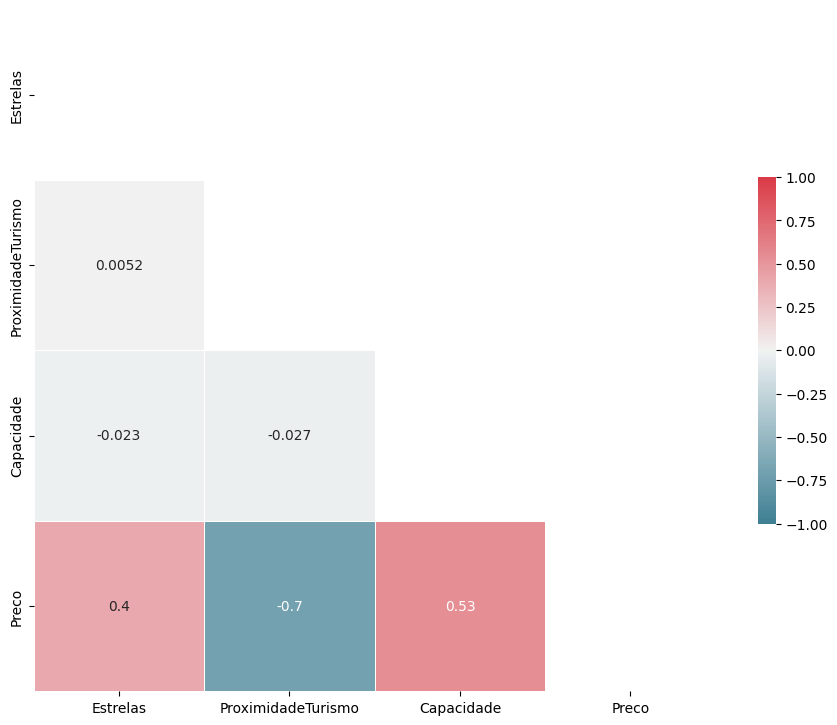

In [62]:
# Generar una máscara para el triángulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True
# Configurar la figura de matplotlib
f, ax = plt.subplots(figsize=(11, 9))
# Generar el mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Mostrar el mapa de calor (heatmap)
plt.show()

In [63]:
# importando los paquetes para la visualización
import plotly.express as px

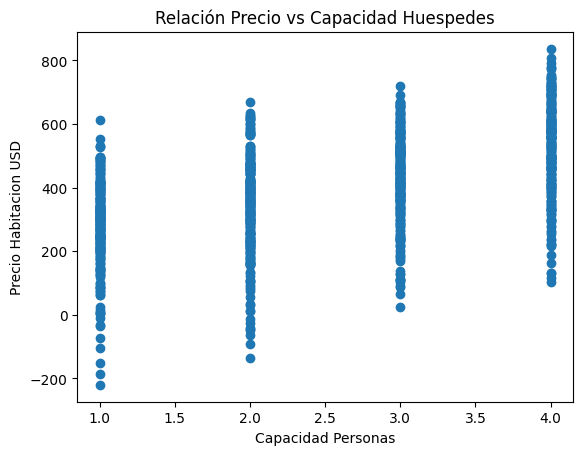

In [64]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['Capacidade'], datos['Preco'])
plt.title('Relación Precio vs Capacidad Huespedes')
plt.xlabel('Capacidad Personas')
plt.ylabel('Precio Habitacion USD')
plt.show()

In [65]:
px.scatter(datos, x='Capacidade', y='Preco', trendline_color_override='red', trendline='ols')

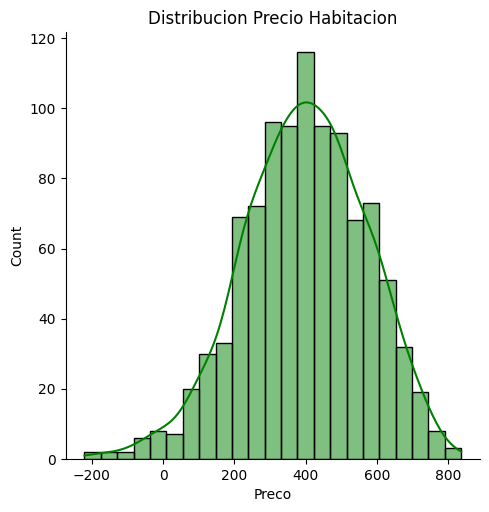

In [66]:
#Quién es nuestra variable de respuesta?
sns.displot(datos['Preco'], kde=True, color='green')
plt.title('Distribucion Precio Habitacion')
plt.show()

In [67]:
# import train_test_split
from sklearn.model_selection import train_test_split
y=datos['Preco']
X=datos.drop(columns='Preco')
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=230)

In [68]:
#Datos de entrenamiento para usar la fórmula
df_train=pd.DataFrame(X_train)
df_train['Preco']=y_train

In [69]:
# import ols
from statsmodels.formula.api import ols

In [70]:
# ajustando el primer modelo
modelo_0=ols('Preco ~ Capacidade', data=df_train).fit()

In [71]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,198.020623
Capacidade,80.707533


In [72]:
# El resumen del modelo
print(modelo_0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     267.1
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           4.51e-51
Time:                        22:05:13   Log-Likelihood:                -4478.6
No. Observations:                 700   AIC:                             8961.
Df Residuals:                     698   BIC:                             8970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    198.0206     13.627     14.532      0.0

In [73]:
# observando el R²
round(modelo_0.rsquared,2)

np.float64(0.28)

In [74]:
# Quiénes son los residuos?
modelo_0.resid

,0
740,5.212912
182,-149.344806
39,157.806114
29,-123.106328
221,75.490480
...,...
271,-27.759639
723,100.269403
560,-113.096772
999,-54.844976


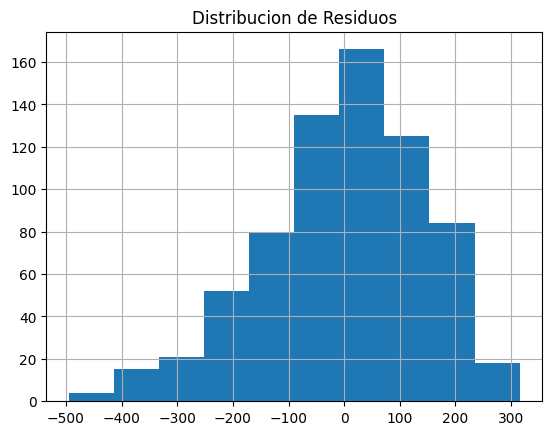

In [75]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribucion de Residuos')
plt.show()

In [76]:
# definiendo la 'Y' prevista
y_predict=modelo_0.predict(X_test)

In [77]:
# importando el r2_score
from sklearn.metrics import r2_score

In [78]:
# mostrando el resultado de r²
print(f'El coeficiente de determinación R² es para el modelo con los datos de prueba es :{round(r2_score(y_test,y_predict),2)}')

El coeficiente de determinación R² es para el modelo con los datos de prueba es :0.29


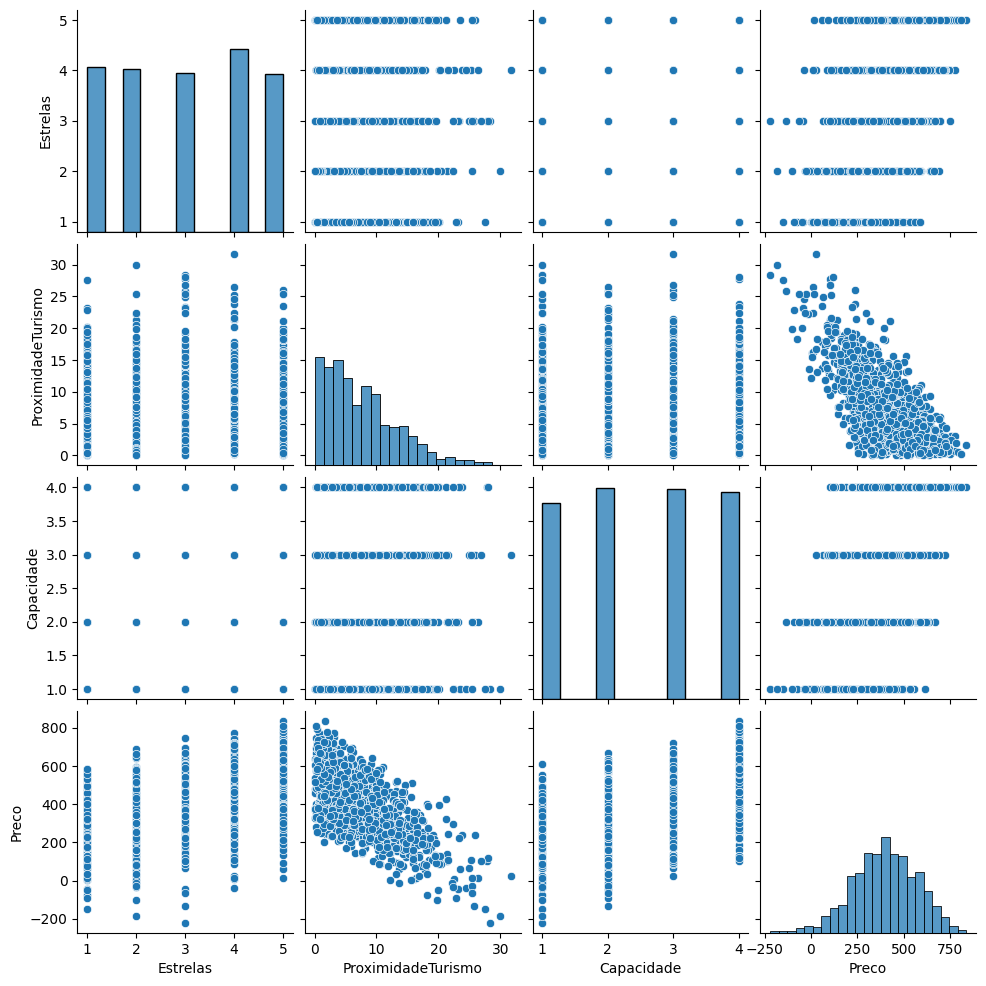

In [79]:
# cuáles otras características podrían explicar el precio de los inmuebles?
sns.pairplot(datos)

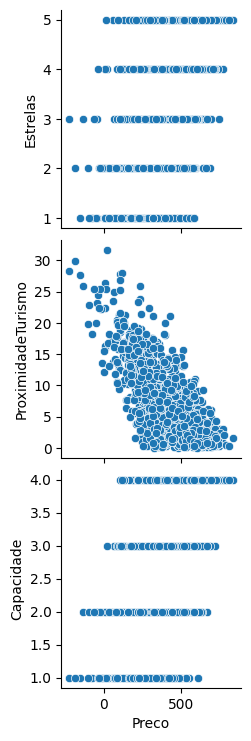

In [80]:
#Vamos a analizar solamente y_vars='precio_de_venta'
sns.pairplot(datos, y_vars=['Estrelas', 'ProximidadeTurismo', 'Capacidade'], x_vars='Preco')

In [81]:
# importando la api de statsmodels
import statsmodels.api as sm

In [82]:
# Añadiendo una constante
X_train=sm.add_constant(X_train)
X_train.head()

,const,Estrelas,ProximidadeTurismo,Capacidade
740,1.0,5,9.724029,3
182,1.0,4,14.893560,4
39,1.0,4,2.524966,1
29,1.0,4,16.709430,2
221,1.0,2,0.229598,1


In [83]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1=sm.OLS(y_train, X_train[['const','Estrelas','ProximidadeTurismo','Capacidade']]).fit()

In [95]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_2=sm.OLS(y_train, X_train[['const','Capacidade','ProximidadeTurismo']]).fit()

In [85]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_3=sm.OLS(y_train, X_train[['const','Capacidade','Estrelas']]).fit()

In [86]:
# Resumen del modelos
modelos=[modelo_0, modelo_1, modelo_2, modelo_3]
for i,j in enumerate(modelos):
    print(f'********************************************************************\n************** El modelo {i} tiene el siguiente resumen **************\n********************************************************************')
    print(j.summary(),'\n\n')

********************************************************************
************** El modelo 0 tiene el siguiente resumen **************
********************************************************************
                            OLS Regression Results                            
Dep. Variable:                  Preco   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     267.1
Date:                Fri, 15 Aug 2025   Prob (F-statistic):           4.51e-51
Time:                        22:05:17   Log-Likelihood:                -4478.6
No. Observations:                 700   AIC:                             8961.
Df Residuals:                     698   BIC:                             8970.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
   

In [96]:
# Cuántos parámetros tiene el modelo?
for i,j in enumerate(modelos):
  print(f'El coeficiente de determinación R² del modelo {i} : {j.rsquared.round(2)}')

El coeficiente de determinación R² del modelo 0 : 0.28
El coeficiente de determinación R² del modelo 1 : 0.92
El coeficiente de determinación R² del modelo 2 : 0.75
El coeficiente de determinación R² del modelo 3 : 0.45


In [97]:
# Añadiendo una constante en X_test
X_test=sm.add_constant(X_test)
X_test.head()

,const,Estrelas,ProximidadeTurismo,Capacidade
858,1.0,1,10.043227,2
766,1.0,4,12.525933,2
608,1.0,3,8.709618,2
185,1.0,3,13.414967,4
25,1.0,4,3.022497,3


In [89]:
# Previsión con el modelo 2
prevision_2=modelo_2.predict(X_test[['const','ProximidadeTurismo','Capacidade']])

In [90]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R² de la base de prevision es : {modelo_2.rsquared.round(2)}')

El coeficiente R² de la base de prevision es : 0.75


In [98]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R² respecto a la base de entrenamiento es : {round(r2_score(y_test, prevision_2),2)}')

El coeficiente R² respecto a la base de entrenamiento es : -21.61


In [101]:
#Nueva Habitacion
nueva_habitacion=pd.DataFrame({
    'const':[1],
    'Capacidade':[4],
    'ProximidadeTurismo':[1.72]
})

In [102]:
#Cuál es el precio del inmueble de acuerdo con el modelo 2?
modelo_2.predict(nueva_habitacion).round(2)

,0
0,637.4
